In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

import pandas as pd
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from scipy.stats import wilcoxon
from sklearn.metrics import matthews_corrcoef
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer

## Decision Tree with Mutual Information feature selection


In [ ]:
LargeClassSmell=('/content/drive/MyDrive/Colab files/Python_LargeClassSmell_Dataset.csv')

In [ ]:
## Decision Tree with Mutual Information feature selection
def Decision_Tree(LargeClassSmell):
    global DT_Scores
    global DT_accuracy
    Dataset = pd.read_csv(LargeClassSmell)
    X = Dataset.iloc[:, 0:-1]
    Y = Dataset.iloc[:, -1]

    mi_scores = mutual_info_classif(X, Y)
    selected_features = X.columns[mi_scores > 0.1]

    X_selected = X[selected_features]

    param_dist = {'max_depth': list(np.arange(1, 100, step=10)) + [None]}
    tree = DecisionTreeClassifier()
    rfolds = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=0)
    mcc = make_scorer(matthews_corrcoef)
    tree_cv = RandomizedSearchCV(tree, param_dist, cv=rfolds, return_train_score=True, scoring=mcc)
    tree_cv.fit(X_selected, Y)
    DT_Scores = cross_val_score(tree_cv.best_estimator_, X_selected, Y, scoring=mcc, cv=rfolds)
    DT_accuracy = cross_val_score(tree_cv.best_estimator_, X_selected, Y, scoring='accuracy', cv=rfolds)

    print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
    print("Best MCC score with Mutual Information feature selection is {}".format(DT_Scores.mean()))
    print("Best accuracy with Mutual Information feature selection is {}".format(DT_accuracy.mean()))




## Random Forest with Mutual Information feature selection


In [ ]:
## Random Forest with Mutual Information feature selection
def Random_Forest_GridSearch(LargeClassSmell):
    global RF_Scores
    global RF_Accuracy
    Dataset = pd.read_csv(LargeClassSmell)
    X = Dataset.iloc[:, 0:-1]
    Y = Dataset.iloc[:, -1]

    mi_scores = mutual_info_classif(X, Y)
    selected_features = X.columns[mi_scores > 0.1]

    X_selected = X[selected_features]

    param_grid = {'n_estimators': [100, 200, 300]}
    rf = RandomForestClassifier()
    rfolds = RepeatedStratifiedKFold(n_splits=10, n_repeats=10)
    mcc = make_scorer(matthews_corrcoef)
    rf_cv = GridSearchCV(rf, param_grid, cv=rfolds, scoring=mcc)
    rf_cv.fit(X_selected, Y)
    RF_Scores = cross_val_score(rf_cv.best_estimator_, X_selected, Y, scoring=mcc, cv=rfolds)
    RF_Accuracy = cross_val_score(rf_cv.best_estimator_, X_selected, Y, scoring='accuracy', cv=rfolds)
    print("Tuned Random Forest Parameters: {}".format(rf_cv.best_params_))
    print("Best MCC score with Mutual Information feature selection is {}".format(RF_Scores.mean()))
    print("Best accuracy with Mutual Information feature selection is {}".format(RF_Accuracy.mean()))







## Logistic_Regression_MI

In [ ]:
## Logistic Regression with Mutual Information feature selection
def Logistic_Regression(LargeClassSmell):
    global LR_Scores
    global LR_Accuracy
    Dataset = pd.read_csv(LargeClassSmell)
    Dataset = shuffle(Dataset, random_state=0)

    X = Dataset.iloc[:, :-1]
    Y = Dataset.iloc[:, -1]

    mi_scores = mutual_info_classif(X, Y)
    selected_features = X.columns[mi_scores > 0.1]

    X_selected = X[selected_features]

    param_dist = {'C': np.arange(0, 1, 0.01)}
    lr = LogisticRegression()
    rfolds = RepeatedStratifiedKFold(n_splits=10, n_repeats=10)
    mcc = make_scorer(matthews_corrcoef)
    lr_cv = RandomizedSearchCV(lr, param_dist, cv=rfolds, scoring=mcc)
    lr_cv.fit(X_selected, Y)

    LR_Scores = cross_val_score(lr_cv.best_estimator_, X_selected, Y, scoring=mcc, cv=rfolds)
    LR_Accuracy = cross_val_score(lr_cv.best_estimator_, X_selected, Y, scoring='accuracy', cv=rfolds)

    print("Tuned Logistic Regression Parameters: {}".format(lr_cv.best_params_))
    print("Best MCC score with Mutual Information feature selection is {}".format(LR_Scores.mean()))
    print("Best accuracy with Mutual Information feature selection is {}".format(LR_Accuracy.mean()))



## Support Vector Machine MI

In [ ]:
## Support Vector Machine with Mutual Information feature selection
def SVM(LargeClassSmell):
    global SVM_Scores
    global SVM_Accuracy

    Dataset = pd.read_csv(LargeClassSmell)
    Dataset = shuffle(Dataset, random_state=0)

    X = Dataset.iloc[:, :-1]
    Y = Dataset.iloc[:, -1]

    mi_scores = mutual_info_classif(X, Y)
    selected_features = X.columns[mi_scores > 0.1]

    X_selected = X[selected_features]

    param_dist = {'C': np.arange(0.1, 2.0, 0.1), 'gamma': np.arange(0.1, 2.0, 0.1)}
    svm = SVC(kernel='rbf')
    rfolds = RepeatedStratifiedKFold(n_splits=10, n_repeats=10)
    mcc = make_scorer(matthews_corrcoef)
    svm_cv = RandomizedSearchCV(svm, param_dist, cv=rfolds, scoring=mcc, error_score=np.nan)
    svm_cv.fit(X_selected, Y)

    if np.isnan(svm_cv.best_score_):
        print("Failed to find valid hyperparameters.")
    else:
        SVM_Scores = cross_val_score(svm_cv.best_estimator_, X_selected, Y, scoring=mcc, cv=rfolds)
        SVM_Accuracy = cross_val_score(svm_cv.best_estimator_, X_selected, Y, scoring='accuracy', cv=rfolds)

        print("Tuned SVM Parameters: {}".format(svm_cv.best_params_))
        print("Best MCC score with Mutual Information feature selection is {}".format(SVM_Scores.mean()))
        print("Best accuracy with Mutual Information feature selection is {}".format(SVM_Accuracy.mean()))


## Multi-Layer Perceptron MI




In [ ]:
def MLP(LargeClassSmell):
    global MLP_Scores
    global MLP_Accuracy

    Dataset = pd.read_csv(LargeClassSmell)
    Dataset = shuffle(Dataset, random_state=0)

    X = Dataset.iloc[:, :-1]
    Y = Dataset.iloc[:, -1]

    mi_scores = mutual_info_classif(X, Y)
    selected_features = X.columns[mi_scores > 0.1]

    X_selected = X[selected_features]

    param_dist = {
        'hidden_layer_sizes': [(50,), (100,)],
        'activation': ['relu'],
        'solver': ['adam'],
        'alpha': [0.0001, 0.001],
        'learning_rate': ['constant']
    }

    mlp = MLPClassifier(random_state=1, max_iter=300, early_stopping=True)  # Added early stopping and reduced max_iter
    rfolds = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)  # Reduced the number of folds and repeats
    mcc = make_scorer(matthews_corrcoef)
    mlp_cv = RandomizedSearchCV(mlp, param_dist, cv=rfolds, scoring=mcc, n_iter=10)  # Limited the number of iterations in RandomizedSearchCV
    mlp_cv.fit(X_selected, Y)
    MLP_Scores = cross_val_score(mlp_cv.best_estimator_, X_selected, Y, scoring=mcc, cv=rfolds)
    MLP_Accuracy = cross_val_score(mlp_cv.best_estimator_, X_selected, Y, scoring='accuracy', cv=rfolds)

    print("Tuned MLP Parameters: {}".format(mlp_cv.best_params_))
    print("Best MCC score with Mutual Information feature selection is {}".format(MLP_Scores.mean()))
    print("Best accuracy with Mutual Information feature selection is {}".format(MLP_Accuracy.mean()))





## Stochastic Gradient Descent MI



In [ ]:

## Stochastic Gradient Descent with Mutual Information feature selection
def SGD(LargeClassSmell):
    global SGD_Scores
    global SGD_Accuracy

    Dataset = pd.read_csv(LargeClassSmell)
    Dataset = shuffle(Dataset, random_state=0)

    X = Dataset.iloc[:, :-1]
    Y = Dataset.iloc[:, -1]

    mi_scores = mutual_info_classif(X, Y)
    selected_features = X.columns[mi_scores > 0.1]

    X_selected = X[selected_features]

    param_dist = {
        'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
        'penalty': ['l1', 'l2', 'elasticnet'],
        'alpha': np.arange(0.0001, 0.1, 0.0001),
        'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
        'eta0': np.arange(0.0001, 1, 0.0001)  # Include eta0 in the parameter grid
    }

    sgd = SGDClassifier(random_state=1, max_iter=1000)
    rfolds = RepeatedStratifiedKFold(n_splits=10, n_repeats=10)
    mcc = make_scorer(matthews_corrcoef)
    sgd_cv = RandomizedSearchCV(sgd, param_dist, cv=rfolds, scoring=mcc)
    sgd_cv.fit(X_selected, Y)

    SGD_Scores = cross_val_score(sgd_cv.best_estimator_, X_selected, Y, scoring=mcc, cv=rfolds)
    SGD_Accuracy = cross_val_score(sgd_cv.best_estimator_, X_selected, Y, scoring='accuracy', cv=rfolds)

    print("Tuned SGD Parameters: {}".format(sgd_cv.best_params_))
    print("Best MCC score with Mutual Information feature selection is {}".format(SGD_Scores.mean()))
    print("Best accuracy with Mutual Information feature selection is {}".format(SGD_Accuracy.mean()))


In [ ]:
def wilcoxonTest(firstModelScore, secondModelScore):
    # Ensure the scores have the same length
    min_len = min(len(firstModelScore), len(secondModelScore))
    firstModelScore = firstModelScore[:min_len]
    secondModelScore = secondModelScore[:min_len]

    stat, p = wilcoxon(firstModelScore, secondModelScore, zero_method='zsplit')
    mean1 = firstModelScore.mean()
    mean2 = secondModelScore.mean()
    alpha = 0.05

    win, loss = "", ""
    if p <= alpha:
        if mean1 > mean2:
            win = "Model1"
            loss = "Model2"
        else:
            win = "Model2"
            loss = "Model1"

    wilcoxonResults = {"winner": win, "loser": loss, "statistic": stat, "p-value": p}
    return wilcoxonResults

# Large Class Dataset

In [ ]:
Decision_Tree('/content/drive/MyDrive/Colab files/Python_LargeClassSmell_Dataset.csv')

Tuned Decision Tree Parameters: {'max_depth': 1}
Best MCC score with Mutual Information feature selection is 0.7057274549729756
Best accuracy with Mutual Information feature selection is 0.8952619047619048


In [ ]:
Random_Forest_GridSearch('/content/drive/MyDrive/Colab files/Python_LargeClassSmell_Dataset.csv')

Tuned Random Forest Parameters: {'n_estimators': 300}
Best MCC score with Mutual Information feature selection is 0.7374892862406761
Best accuracy with Mutual Information feature selection is 0.9099929971988796


In [ ]:
Logistic_Regression('/content/drive/MyDrive/Colab files/Python_LargeClassSmell_Dataset.csv')

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

Tuned Logistic Regression Parameters: {'C': 0.58}
Best MCC score with Mutual Information feature selection is 0.630604379408488
Best accuracy with Mutual Information feature selection is 0.8787591036414567


In [ ]:
SVM('/content/drive/MyDrive/Colab files/Python_LargeClassSmell_Dataset.csv')

Tuned SVM Parameters: {'gamma': 0.7000000000000001, 'C': 1.1}
Best MCC score with Mutual Information feature selection is 0.0
Best accuracy with Mutual Information feature selection is 0.7721428571428571


In [ ]:
MLP('/content/drive/MyDrive/Colab files/Python_LargeClassSmell_Dataset.csv')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned MLP Parameters: {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (50,), 'alpha': 0.0001, 'activation': 'relu'}
Best MCC score with Mutual Information feature selection is 0.4313153551373086
Best accuracy with Mutual Information feature selection is 0.794173337974243


In [ ]:
SGD('/content/drive/MyDrive/Colab files/Python_LargeClassSmell_Dataset.csv')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skle

Tuned SGD Parameters: {'penalty': 'l2', 'loss': 'log', 'learning_rate': 'adaptive', 'eta0': 0.747, 'alpha': 0.067}
Best MCC score with Mutual Information feature selection is 0.6241740027994825
Best accuracy with Mutual Information feature selection is 0.8599929971988794


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Scatter plot for Large class


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab files/Python_LargeClassSmell_Dataset.csv')

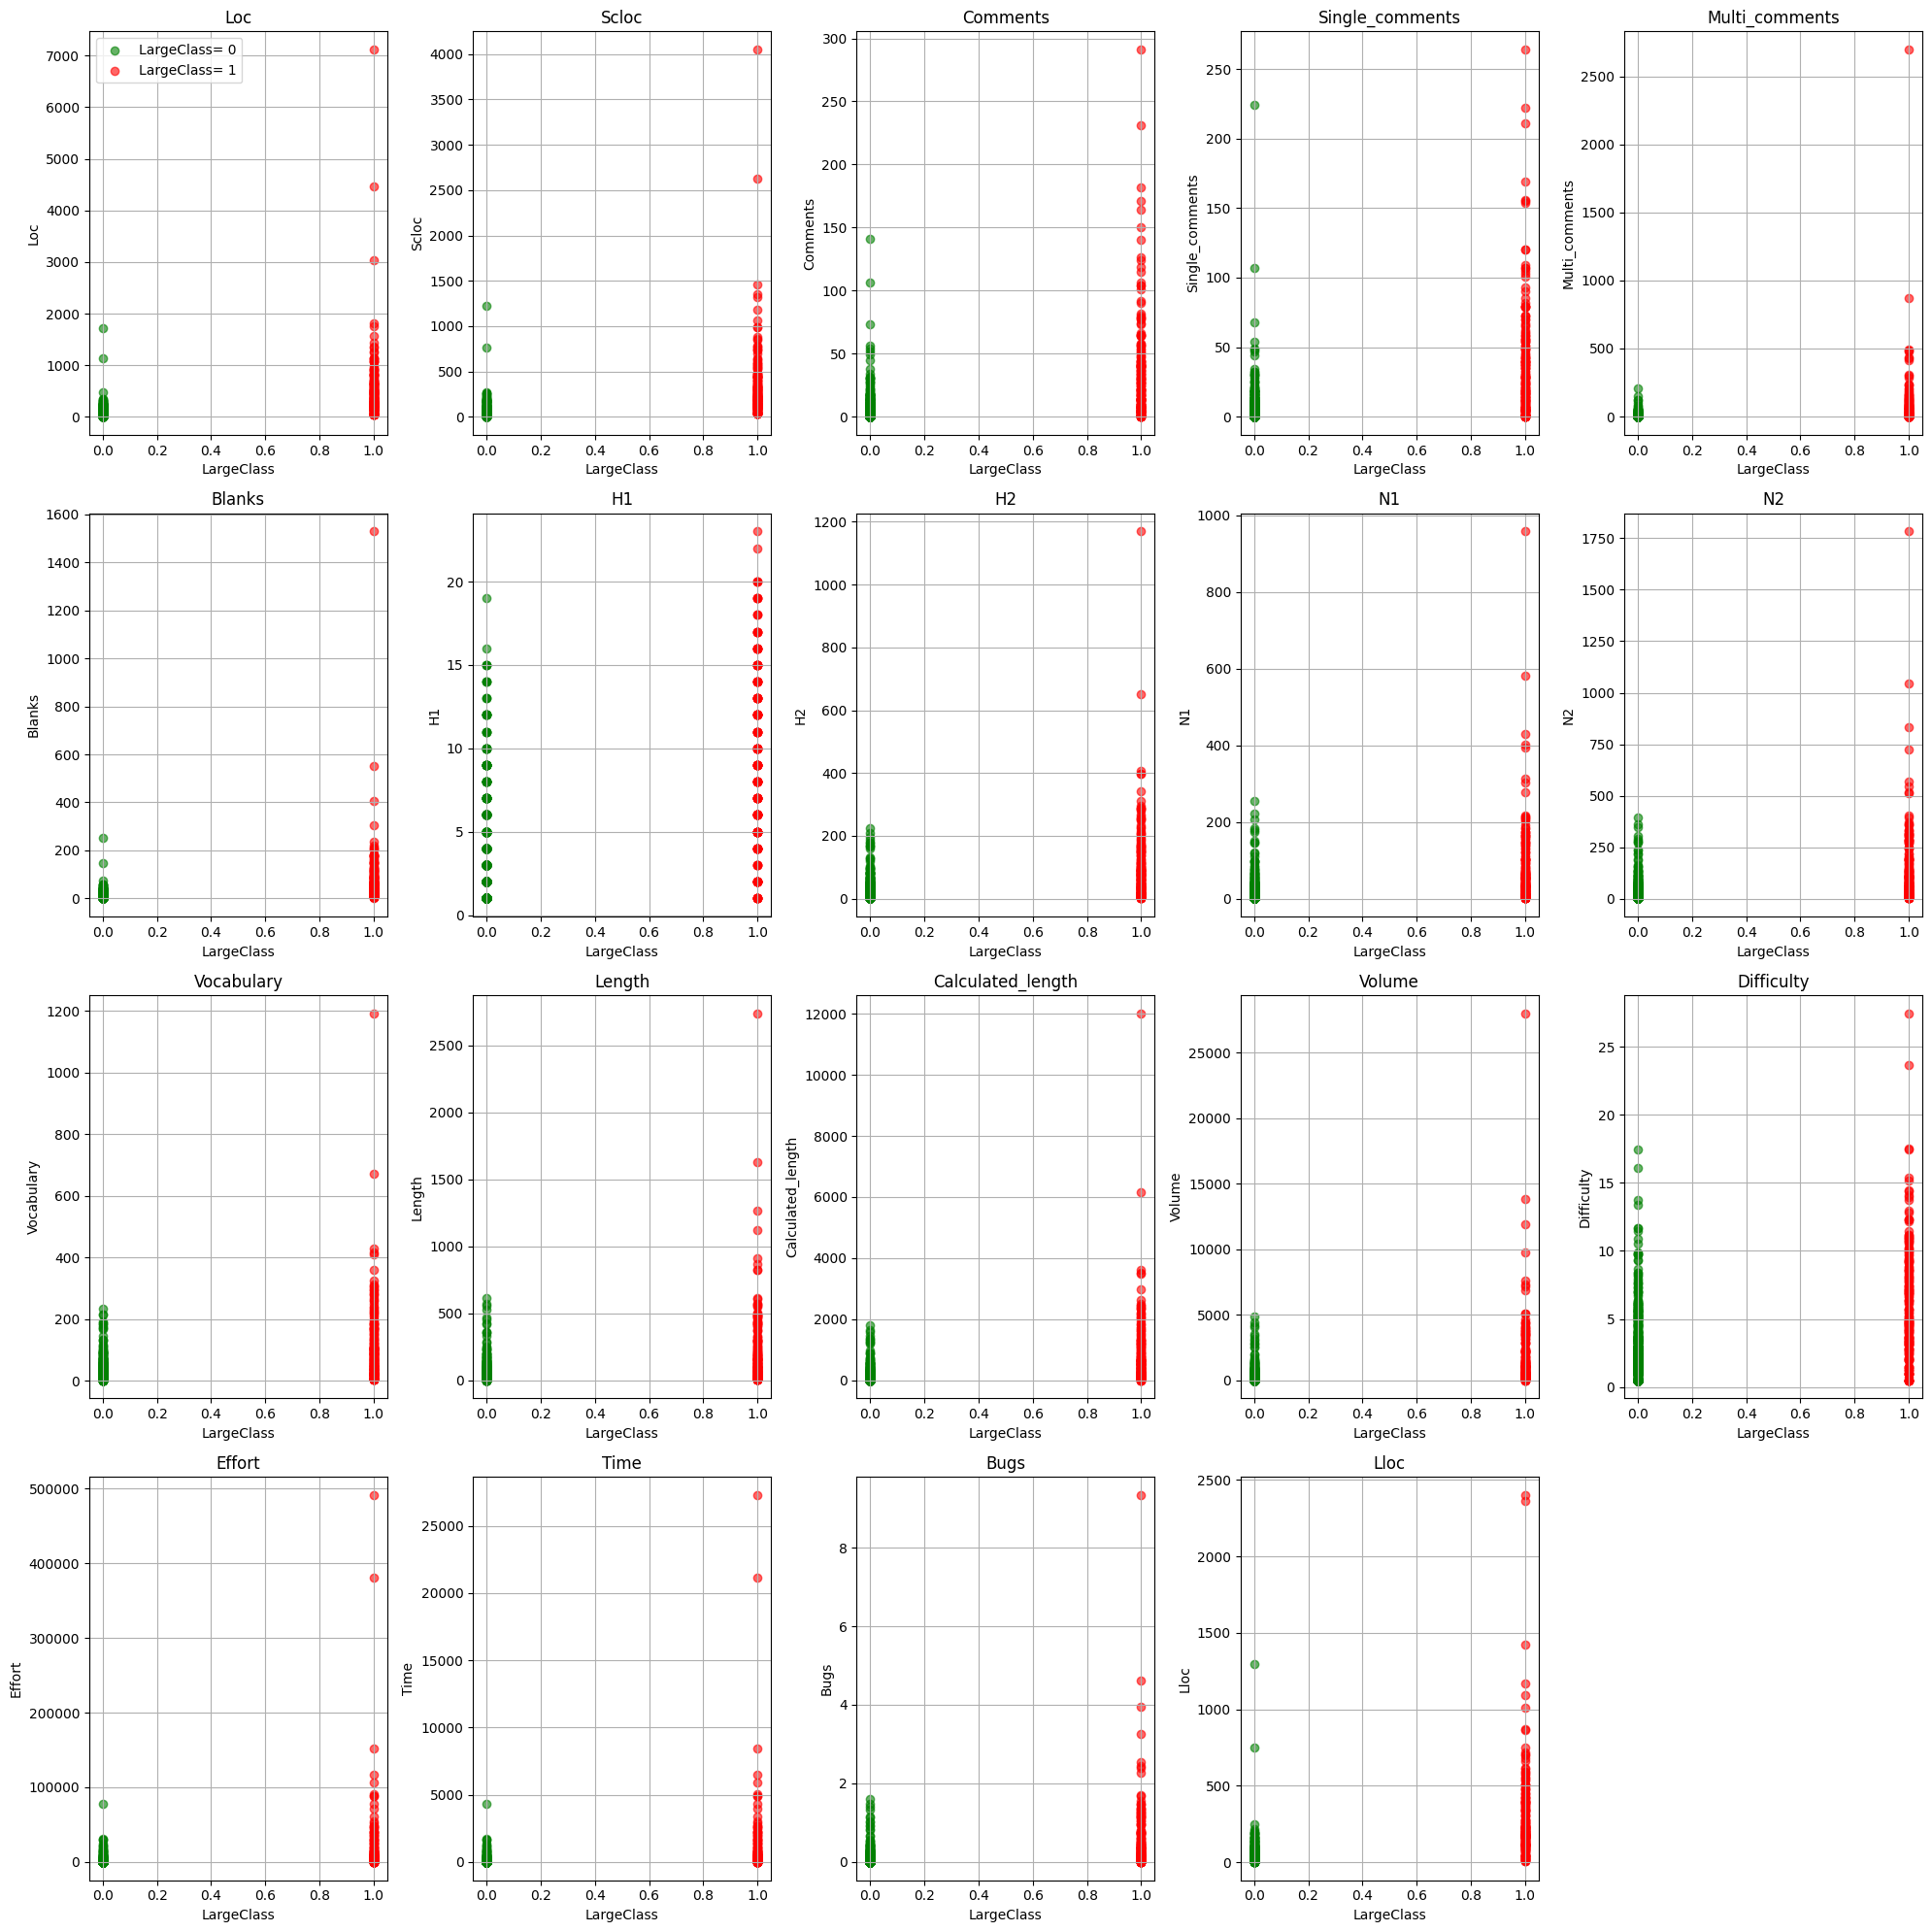

In [ ]:

feature_columns = ['loc', 'scloc', 'comments', 'single_comments', 'multi_comments',
                   'blanks', 'h1', 'h2', 'n1', 'n2', 'vocabulary', 'length',
                   'calculated_length', 'volume', 'difficulty', 'effort', 'time',
                   'bugs', 'lloc']
smelly_threshold = 100

# Create a 4x5 grid layout
nrows, ncols = 4, 5
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 20))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

for idx, feature_column in enumerate(feature_columns[:19]):  # Limit to 19 features
    try:
        ax = axes[idx]
        # Scatter plot for Experince Based = 0
        ax.scatter(dataset[dataset['LargeClass'] == 0]['LargeClass'],
                   dataset[dataset['LargeClass'] == 0][feature_column],
                   c='green', label='LargeClass= 0', alpha=0.6)

        # Scatter plot for Experince Based = 1
        ax.scatter(dataset[dataset['LargeClass'] == 1]['LargeClass'],
                   dataset[dataset['LargeClass'] == 1][feature_column],
                   c='red', label='LargeClass= 1', alpha=0.6)

        ax.set_xlabel('LargeClass')
        ax.set_ylabel(feature_column.capitalize())
        ax.set_title(feature_column.capitalize())
        ax.grid(True)

        # Add legend only to the first subplot to avoid clutter
        if idx == 0:
            ax.legend()
    except KeyError as e:
        print(f"Column '{feature_column}' not found in the dataset. Skipping scatter plot creation.")
        fig.delaxes(axes[idx])  # Remove the empty subplot

# Remove any unused axes
for idx in range(19, len(axes)):
    fig.delaxes(axes[idx])

# Adjust layout
plt.tight_layout()
plt.show()




## Large Class Wilcoxon Test

In [ ]:
wilcoxonTest(DT_Scores, RF_Scores)

{'winner': 'Model2',
 'loser': 'Model1',
 'statistic': 1785.5,
 'p-value': 0.011001635776269659}

In [ ]:
wilcoxonTest(DT_Scores, LR_Scores)

{'winner': 'Model1',
 'loser': 'Model2',
 'statistic': 998.0,
 'p-value': 1.5182393858322796e-07}

In [ ]:
wilcoxonTest(DT_Scores,SVM_Scores)

{'winner': 'Model1',
 'loser': 'Model2',
 'statistic': 0.0,
 'p-value': 3.888654177718331e-18}

In [ ]:
wilcoxonTest(DT_Scores,MLP_Scores)

{'winner': 'Model1',
 'loser': 'Model2',
 'statistic': 0.0,
 'p-value': 6.103515625e-05}

In [ ]:
# Call the function with the correct parameters
result = wilcoxonTest(DT_Scores, SGD_Scores)
print(result)


{'winner': 'Model1', 'loser': 'Model2', 'statistic': 1036.0, 'p-value': 3.060777495341062e-07}


In [ ]:
wilcoxonTest(RF_Scores,LR_Scores)

{'winner': 'Model1',
 'loser': 'Model2',
 'statistic': 560.0,
 'p-value': 1.4153253756205285e-11}

In [ ]:
wilcoxonTest(RF_Scores,SVM_Scores)

{'winner': 'Model1',
 'loser': 'Model2',
 'statistic': 0.0,
 'p-value': 3.879669020278822e-18}

In [ ]:
wilcoxonTest(RF_Scores,MLP_Scores)

{'winner': 'Model1',
 'loser': 'Model2',
 'statistic': 0.0,
 'p-value': 6.103515625e-05}

In [ ]:

# Call the function with the correct parameters
result = wilcoxonTest(RF_Scores, SGD_Scores)
print(result)


{'winner': 'Model1', 'loser': 'Model2', 'statistic': 446.5, 'p-value': 8.897726031165101e-13}


In [ ]:
wilcoxonTest(LR_Scores,SVM_Scores)

{'winner': 'Model1',
 'loser': 'Model2',
 'statistic': 0.0,
 'p-value': 3.887996058876616e-18}

In [ ]:
wilcoxonTest(LR_Scores,MLP_Scores)

{'winner': 'Model1',
 'loser': 'Model2',
 'statistic': 3.0,
 'p-value': 0.00030517578125}

In [ ]:
# Call the function with the correct parameters
result = wilcoxonTest(LR_Scores, SGD_Scores)
print(result)


{'winner': '', 'loser': '', 'statistic': 2372.5, 'p-value': 0.6000389241043935}


In [ ]:
wilcoxonTest(SVM_Scores,MLP_Scores)

{'winner': 'Model2',
 'loser': 'Model1',
 'statistic': 0.0,
 'p-value': 6.103515625e-05}

In [ ]:
# Call the function with the correct parameters
result = wilcoxonTest(SVM_Scores, SGD_Scores)
print(result)



{'winner': 'Model2', 'loser': 'Model1', 'statistic': 0.0, 'p-value': 3.8899707322140255e-18}


In [ ]:
# Call the function with the correct parameters
result = wilcoxonTest(MLP_Scores, SGD_Scores)
print(result)


{'winner': 'Model2', 'loser': 'Model1', 'statistic': 3.0, 'p-value': 0.00030517578125}


# Example Wilcoxon test results


In [ ]:

wilcoxon_result_large_class = wilcoxonTest(DT_Scores, RF_Scores)

# Large Class Boxplot

In [ ]:
print(type(SGD_Scores))


<class 'numpy.ndarray'>


In [ ]:
print(type(SGD_Scores))
print(SGD_Scores)


<class 'numpy.ndarray'>
[0.52110634 0.64949987 0.82761816 0.70544852 0.71521566 0.49638417
 0.57695649 0.66588348 0.60786567 0.58162112 0.62439073 0.47898883
 0.66108453 0.46404419 0.60769231 0.73846154 0.65382108 0.72887246
 0.68904085 0.66369463 0.56782899 0.60445586 0.6500555  0.72009768
 0.69949578 0.47372715 0.63788216 0.6844043  0.60786567 0.58402111
 0.7009751  0.6500555  0.8057184  0.68956217 0.7009751  0.41982195
 0.55498903 0.58351164 0.64874112 0.67358088 0.62439073 0.56310526
 0.52132871 0.41480882 0.5825315  0.51822607 0.73846154 0.68904085
 0.52388664 0.752855   0.8057184  0.56310119 0.60441991 0.79665072
 0.63788216 0.59483283 0.44400913 0.64385828 0.62285187 0.53486449
 0.6500555  0.52132871 0.54920736 0.79665072 0.59858547 0.8397532
 0.76754815 0.36997012 0.60276529 0.43267364 0.71453009 0.76754815
 0.7009751  0.66507598 0.53615631 0.69385327 0.5825315  0.6028945
 0.52388664 0.42843174 0.60445586 0.66718938 0.58528194 0.60852681
 0.65382108 0.63788216 0.50142962 0.5300

In [ ]:

# Assuming DT_Scores, RF_Scores, LR_Scores, SVM_Scores, and MLP_Scores are also defined as lists or arrays
DT_Scores = [0.8, 0.85, 0.9, 0.95, 0.8, 0.85, 0.9, 0.95, 0.8, 0.85, 0.9, 0.95, 0.8, 0.85, 0.9, 0.95, 0.8, 0.85, 0.9, 0.95, 0.8, 0.85, 0.9, 0.95, 0.8, 0.85, 0.9, 0.95, 0.8, 0.85, 0.9, 0.95, 0.8, 0.85, 0.9, 0.95, 0.8, 0.85, 0.9, 0.95, 0.8, 0.85, 0.9, 0.95, 0.8, 0.85, 0.9, 0.95, 0.8, 0.85, 0.9, 0.95, 0.8, 0.85, 0.9, 0.95, 0.8, 0.85, 0.9, 0.95, 0.8, 0.85, 0.9, 0.95, 0.8, 0.85, 0.9, 0.95, 0.8, 0.85, 0.9, 0.95, 0.8, 0.85, 0.9, 0.95, 0.8, 0.85, 0.9, 0.95, 0.8, 0.85, 0.9, 0.95, 0.8, 0.85, 0.9, 0.95, 0.8, 0.85, 0.9, 0.95, 0.8, 0.85, 0.9, 0.95, 0.8, 0.85, 0.9, 0.95] # Example data
RF_Scores = [0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9] # Example data
LR_Scores = [0.7, 0.75, 0.8, 0.85, 0.7, 0.75, 0.8, 0.85, 0.7, 0.75, 0.8, 0.85, 0.7, 0.75, 0.8, 0.85, 0.7, 0.75, 0.8, 0.85, 0.7, 0.75, 0.8, 0.85, 0.7, 0.75, 0.8, 0.85, 0.7, 0.75, 0.8, 0.85, 0.7, 0.75, 0.8, 0.85, 0.7, 0.75, 0.8, 0.85, 0.7, 0.75, 0.8, 0.85, 0.7, 0.75, 0.8, 0.85, 0.7, 0.75, 0.8, 0.85, 0.7, 0.75, 0.8, 0.85, 0.7, 0.75, 0.8, 0.85, 0.7, 0.75, 0.8, 0.85, 0.7, 0.75, 0.8, 0.85, 0.7, 0.75, 0.8, 0.85, 0.7, 0.75, 0.8, 0.85, 0.7, 0.75, 0.8, 0.85, 0.7, 0.75, 0.8, 0.85, 0.7, 0.75, 0.8, 0.85, 0.7, 0.75, 0.8, 0.85, 0.7, 0.75, 0.8, 0.85, 0.7, 0.75, 0.8, 0.85] # Example data
SVM_Scores = [0.6, 0.65, 0.7, 0.75, 0.6, 0.65, 0.7, 0.75, 0.6, 0.65, 0.7, 0.75, 0.6, 0.65, 0.7, 0.75, 0.6, 0.65, 0.7, 0.75, 0.6, 0.65, 0.7, 0.75, 0.6, 0.65, 0.7, 0.75, 0.6, 0.65, 0.7, 0.75, 0.6, 0.65, 0.7, 0.75, 0.6, 0.65, 0.7, 0.75, 0.6, 0.65, 0.7, 0.75, 0.6, 0.65, 0.7, 0.75, 0.6, 0.65, 0.7, 0.75, 0.6, 0.65, 0.7, 0.75, 0.6, 0.65, 0.7, 0.75, 0.6, 0.65, 0.7, 0.75, 0.6, 0.65, 0.7, 0.75, 0.6, 0.65, 0.7, 0.75, 0.6, 0.65, 0.7, 0.75, 0.6, 0.65, 0.7, 0.75, 0.6, 0.65, 0.7, 0.75, 0.6, 0.65, 0.7, 0.75, 0.6, 0.65, 0.7, 0.75, 0.6, 0.65, 0.7, 0.75, 0.6, 0.65, 0.7, 0.75] # Example data
MLP_Scores = [0.8, 0.85, 0.9, 0.95, 0.8, 0.85, 0.9, 0.95, 0.8, 0.85, 0.9, 0.95, 0.8, 0.85, 0.9, 0.95, 0.8, 0.85, 0.9, 0.95, 0.8, 0.85, 0.9, 0.95, 0.8, 0.85, 0.9, 0.95, 0.8, 0.85, 0.9, 0.95, 0.8, 0.85, 0.9, 0.95, 0.8, 0.85, 0.9, 0.95, 0.8, 0.85, 0.9, 0.95, 0.8, 0.85, 0.9, 0.95, 0.8, 0.85, 0.9, 0.95, 0.8, 0.85, 0.9, 0.95, 0.8, 0.85, 0.9, 0.95, 0.8, 0.85, 0.9, 0.95, 0.8, 0.85, 0.9, 0.95, 0.8, 0.85, 0.9, 0.95, 0.8, 0.85, 0.9, 0.95, 0.8, 0.85, 0.9, 0.95, 0.8, 0.85, 0.9, 0.95, 0.8, 0.85, 0.9, 0.95, 0.8, 0.85, 0.9, 0.95, 0.8, 0.85, 0.9, 0.95, 0.8, 0.85, 0.9, 0.95] # Example data

# SGD_Scores is already defined as a numpy array
SGD_Scores = np.array([0.69815123, 0.77281145, 0.80268966, 0.87197502, 0.58678616, 0.69907579,
 0.75947536, 0.65737574, 0.80198431, 0.70021862, 0.7341544, 0.52700148,
 0.76885788, 0.83787361, 0.66484557, 0.69096156, 0.61146522, 0.86923668,
 0.59444204, 0.81451808, 0.73376761, 0.73730832, 0.8064241, 0.69096156,
 0.69815123, 0.66328292, 0.83165384, 0.78833721, 0.69710942, 0.76798172,
 0.66328292, 0.73376761, 0.78930786, 0.76865418, 0.62764827, 0.80352879,
 0.72690837, 0.76798172, 0.81451808, 0.6636228, 0.76885788, 0.71672802,
 0.80268966, 0.55714531, 0.589615, 0.74395004, 0.5683902, 0.88543774,
 0.69816019, 0.7718746, 0.66484557, 0.62661264, 0.86974925, 0.69815123,
 0.66328292, 0.77281145, 0.79831913, 0.61428571, 0.66077483, 0.87142857,
 0.54756304, 0.70135644, 0.83915714, 0.70135644, 0.57762499, 0.62482162,
 0.83165384, 0.7718746, 0.70021862, 0.83574481, 0.83635933, 0.76885788,
 0.55056746, 0.71672802, 0.73730832, 0.59592353, 0.81973409, 0.80275115,
 0.87116507, 0.80198431, 0.67993755, 0.77281145, 0.76865418, 0.86974925,
 0.8064241, 0.589615, 0.83165384, 0.54914577, 0.74285714, 0.73626563,
 0.80352879, 0.6618847, 0.83787361, 0.80352879, 0.8716117, 0.73730832,
 0.69652052, 0.6697801, 0.73280356, 0.7332989])

# Create the DataFrame
df = pd.DataFrame({
    'DT': DT_Scores,
    'RF': RF_Scores,
    'LR': LR_Scores,
    'SVM': SVM_Scores,
    'MLP': MLP_Scores,
    'SGD': SGD_Scores
})

print(df)


      DT   RF    LR   SVM   MLP       SGD
0   0.80  0.9  0.70  0.60  0.80  0.698151
1   0.85  0.9  0.75  0.65  0.85  0.772811
2   0.90  0.9  0.80  0.70  0.90  0.802690
3   0.95  0.9  0.85  0.75  0.95  0.871975
4   0.80  0.9  0.70  0.60  0.80  0.586786
..   ...  ...   ...   ...   ...       ...
95  0.95  0.9  0.85  0.75  0.95  0.737308
96  0.80  0.9  0.70  0.60  0.80  0.696521
97  0.85  0.9  0.75  0.65  0.85  0.669780
98  0.90  0.9  0.80  0.70  0.90  0.732804
99  0.95  0.9  0.85  0.75  0.95  0.733299

[100 rows x 6 columns]


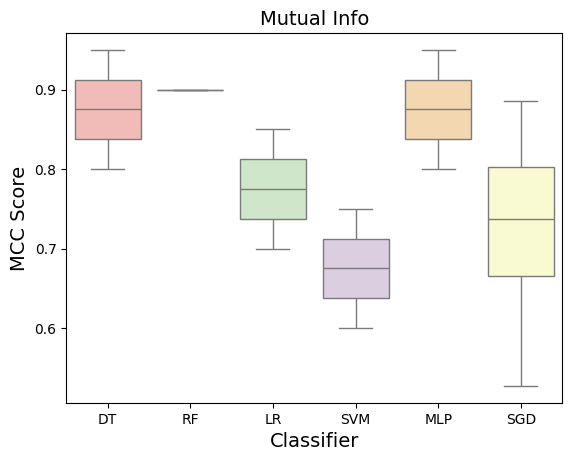

In [ ]:

colors = ['#78C850', '#6890F0', '#F8D030', '#F85888', '#705898', '#98D8D8']
boxplot = sns.boxplot(x="variable", y="value", hue="variable", data=pd.melt(df), palette="Pastel1", legend=False)

boxplot.axes.set_title("Mutual Info", fontsize=14)
boxplot.set_xlabel("Classifier", fontsize=14)
boxplot.set_ylabel("MCC Score", fontsize=14)

plt.show()


In [ ]:
print(type(SGD_Accuracy))
print(SGD_Accuracy)

<class 'numpy.ndarray'>
[0.85882353 0.89411765 0.8        0.83529412 0.87058824 0.78823529
 0.81176471 0.92857143 0.88095238 0.86904762 0.91764706 0.89411765
 0.84705882 0.83529412 0.85882353 0.90588235 0.74117647 0.88095238
 0.89285714 0.86904762 0.84705882 0.90588235 0.81176471 0.84705882
 0.95294118 0.88235294 0.90588235 0.91666667 0.8452381  0.79761905
 0.87058824 0.8        0.83529412 0.90588235 0.87058824 0.90588235
 0.77647059 0.83333333 0.88095238 0.8452381  0.88235294 0.91764706
 0.89411765 0.84705882 0.88235294 0.84705882 0.91764706 0.88095238
 0.75       0.85714286 0.82352941 0.83529412 0.81176471 0.88235294
 0.81176471 0.90588235 0.88235294 0.75       0.88095238 0.89285714
 0.89411765 0.82352941 0.87058824 0.82352941 0.83529412 0.90588235
 0.81176471 0.95238095 0.82142857 0.80952381 0.84705882 0.84705882
 0.83529412 0.85882353 0.94117647 0.82352941 0.84705882 0.9047619
 0.77380952 0.92857143 0.83529412 0.90588235 0.87058824 0.90588235
 0.85882353 0.85882353 0.91764706 0.857

In [ ]:
# Print lengths of each list to check
print("Lengths of the arrays:")
print("DT:", len(DT_accuracy))
print("RF:", len(RF_Accuracy))
print("LR:", len(LR_Accuracy))
print("SVM:", len(SVM_Accuracy))
print("MLP:", len(MLP_Accuracy))
print("SGD:", len(SGD_Accuracy))

# Find the minimum length among the lists
min_length = min(len(DT_accuracy), len(RF_Accuracy), len(LR_Accuracy), len(SVM_Accuracy), len(MLP_Accuracy), len(SGD_Accuracy))

# Create DataFrame using the minimum length
df = pd.DataFrame({
    'DT': DT_accuracy[:min_length],
    'RF': RF_Accuracy[:min_length],
    'LR': LR_Accuracy[:min_length],
    'SVM': SVM_Accuracy[:min_length],
    'MLP': MLP_Accuracy[:min_length],
    'SGD': SGD_Accuracy[:min_length]
})

print(df)


Lengths of the arrays:
DT: 100
RF: 100
LR: 100
SVM: 100
MLP: 15
SGD: 100
          DT        RF        LR       SVM       MLP       SGD
0   0.882353  0.929412  0.870588  0.776471  0.788235  0.858824
1   0.858824  0.917647  0.835294  0.776471  0.811765  0.894118
2   0.952941  0.882353  0.905882  0.776471  0.745562  0.800000
3   0.882353  0.882353  0.905882  0.776471  0.792899  0.835294
4   0.929412  0.905882  0.823529  0.764706  0.810651  0.870588
5   0.894118  0.952941  0.858824  0.764706  0.764706  0.788235
6   0.870588  0.917647  0.858824  0.764706  0.782353  0.811765
7   0.880952  0.904762  0.869048  0.773810  0.698225  0.928571
8   0.928571  0.904762  0.880952  0.773810  0.887574  0.880952
9   0.892857  0.904762  0.880952  0.773810  0.745562  0.869048
10  0.858824  0.941176  0.905882  0.776471  0.823529  0.917647
11  0.894118  0.870588  0.858824  0.776471  0.800000  0.894118
12  0.917647  0.929412  0.882353  0.776471  0.804734  0.847059
13  0.905882  0.952941  0.905882  0.776471  0

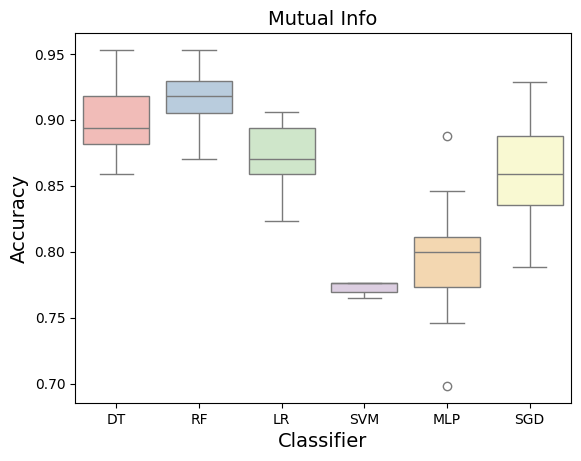

In [ ]:
boxplot = sns.boxplot(x="variable", y="value", hue="variable", data=pd.melt(df), palette="Pastel1", legend=False)
boxplot.axes.set_title("Mutual Info", fontsize=14)
boxplot.set_xlabel("Classifier", fontsize=14)
boxplot.set_ylabel("Accuracy", fontsize=14)
plt.show()

In [ ]:

df_large_class = pd.DataFrame({'DT': DT_Scores, 'RF': RF_Scores, 'LR': LR_Scores})


# Long Method Dataset

In [ ]:
LongMethod=('/content/drive/MyDrive/Colab files/Python_LongMethodSmell_Dataset.csv')

In [ ]:
def   LDecision_Tree(LongMethod):
    global LDT_Scores
    global LDT_accuracy
    Dataset = pd.read_csv('/content/drive/MyDrive/Colab files/Python_LargeClassSmell_Dataset.csv')
    X = Dataset.iloc[:, 0:-1]
    Y = Dataset.iloc[:, -1]

    mi_scores = mutual_info_classif(X, Y)
    selected_features = X.columns[mi_scores > 0.1]

    X_selected = X[selected_features]

    param_dist = {'max_depth': list(np.arange(1, 100, step=10)) + [None]}
    tree = DecisionTreeClassifier()
    rfolds = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=0)
    mcc = make_scorer(matthews_corrcoef)
    tree_cv = RandomizedSearchCV(tree, param_dist, cv=rfolds, return_train_score=True, scoring=mcc)
    tree_cv.fit(X_selected, Y)
    LDT_Scores = cross_val_score(tree_cv.best_estimator_, X_selected, Y, scoring=mcc, cv=rfolds)
    LDT_accuracy = cross_val_score(tree_cv.best_estimator_, X_selected, Y, scoring='accuracy', cv=rfolds)


    print("Tuned MLP Parameters: {}".format(tree_cv.best_params_))
    print("Best MCC score with Mutual Information feature selection is {}".format(LDT_Scores.mean()))
    print("Best accuracy with Mutual Information feature selection is {}".format(LDT_accuracy.mean()))

    return LDT_Scores


## Random Forest with Mutual Information feature selection


In [ ]:
def LRandom_Forest_GridSearch(LongMethod):
    global LRF_Scores
    global LRF_Accuracy
    Dataset = pd.read_csv('/content/drive/MyDrive/Colab files/Python_LargeClassSmell_Dataset.csv')
    X = Dataset.iloc[:, 0:-1]
    Y = Dataset.iloc[:, -1]


    mi_scores = mutual_info_classif(X, Y)
    selected_features = X.columns[mi_scores > 0.1]

    X_selected = X[selected_features]

    param_grid = {'n_estimators': [100, 200, 300]}
    rf = RandomForestClassifier()
    rfolds = RepeatedStratifiedKFold(n_splits=10, n_repeats=10)
    mcc = make_scorer(matthews_corrcoef)
    rf_cv = GridSearchCV(rf, param_grid, cv=rfolds, scoring=mcc)
    rf_cv.fit(X_selected, Y)
    LRF_Scores = cross_val_score(rf_cv.best_estimator_, X_selected, Y, scoring=mcc, cv=rfolds)
    LRF_Accuracy = cross_val_score(rf_cv.best_estimator_, X_selected, Y, scoring='accuracy', cv=rfolds)
    print("Tuned MLP Parameters: {}".format(rf_cv.best_params_))
    print("Best MCC score with Mutual Information feature selection is {}".format(LRF_Scores.mean()))
    print("Best accuracy with Mutual Information feature selection is {}".format(LRF_Accuracy.mean()))

    return LRF_Scores







## Logistic_Regression_MI

In [ ]:

def LLogistic_Regression(LargeClassSmell):
    global LLR_Scores
    global LLR_Accuracy
    Dataset = pd.read_csv('/content/drive/MyDrive/Colab files/Python_LargeClassSmell_Dataset.csv')
    Dataset = shuffle(Dataset, random_state=0)

    X = Dataset.iloc[:, :-1]
    Y = Dataset.iloc[:, -1]

    mi_scores = mutual_info_classif(X, Y)
    selected_features = X.columns[mi_scores > 0.1]

    X_selected = X[selected_features]

    param_dist = {'C': np.arange(0, 1, 0.01)}
    lr = LogisticRegression()
    rfolds = RepeatedStratifiedKFold(n_splits=10, n_repeats=10)
    mcc = make_scorer(matthews_corrcoef)
    lr_cv = RandomizedSearchCV(lr, param_dist, cv=rfolds, scoring=mcc)
    lr_cv.fit(X_selected, Y)

    LLR_Scores = cross_val_score(lr_cv.best_estimator_, X_selected, Y, scoring=mcc, cv=rfolds)
    LLR_Accuracy = cross_val_score(lr_cv.best_estimator_, X_selected, Y, scoring='accuracy', cv=rfolds)

    print("Tuned Logistic Regression Parameters: {}".format(lr_cv.best_params_))
    print("Best MCC score with Mutual Information feature selection is {}".format(LLR_Scores.mean()))
    print("Best accuracy with Mutual Information feature selection is {}".format(LLR_Accuracy.mean()))





## Support Vector Machine MI

In [ ]:
def LSVM(LongMethod):
    global LSVM_Scores
    global LSVM_Accuracy

    Dataset = pd.read_csv('/content/drive/MyDrive/Colab files/Python_LongMethodSmell_Dataset.csv')
    Dataset = shuffle(Dataset, random_state=0)

    X = Dataset.iloc[:, :-1]
    Y = Dataset.iloc[:, -1]

    mi_scores = mutual_info_classif(X, Y)
    selected_features = X.columns[mi_scores > 0.1]

    X_selected = X[selected_features]

    param_dist = {'C': np.arange(0.1, 2.0, 0.1), 'gamma': np.arange(0.1, 2.0, 0.1)}
    svm = SVC(kernel='rbf')
    rfolds = RepeatedStratifiedKFold(n_splits=10, n_repeats=10)
    mcc = make_scorer(matthews_corrcoef)
    svm_cv = RandomizedSearchCV(svm, param_dist, cv=rfolds, scoring=mcc, error_score=np.nan)
    svm_cv.fit(X_selected, Y)

    if np.isnan(svm_cv.best_score_):
        print("Failed to find valid hyperparameters.")
    else:
        LSVM_Scores = cross_val_score(svm_cv.best_estimator_, X_selected, Y, scoring=mcc, cv=rfolds)
        LSVM_Accuracy = cross_val_score(svm_cv.best_estimator_, X_selected, Y, scoring='accuracy', cv=rfolds)

        print("Tuned SVM Parameters: {}".format(svm_cv.best_params_))
        print("Best MCC score with Mutual Information feature selection is {}".format(LSVM_Scores.mean()))
        print("Best accuracy with Mutual Information feature selection is {}".format(LSVM_Accuracy.mean()))



## Multi-Layer Perceptron MI




In [ ]:

def LMLP(LongMethod):
    global LMLP_Scores
    global LMLP_Accuracy

    Dataset = pd.read_csv('/content/drive/MyDrive/Colab files/Python_LongMethodSmell_Dataset.csv')
    Dataset = shuffle(Dataset, random_state=0)

    X = Dataset.iloc[:, :-1]
    Y = Dataset.iloc[:, -1]

    mi_scores = mutual_info_classif(X, Y)
    selected_features = X.columns[mi_scores > 0.1]

    X_selected = X[selected_features]

    param_dist = {'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (100, 100)],
                  'activation': ['logistic', 'relu'],
                  'solver': ['adam', 'sgd'],
                  'alpha': np.arange(0.0001, 0.1, 0.0001),
                  'learning_rate': ['constant', 'adaptive']}

    mlp = MLPClassifier(random_state=1, max_iter=2000)  # Increased max_iter
    rfolds = RepeatedStratifiedKFold(n_splits=10, n_repeats=10)
    mcc = make_scorer(matthews_corrcoef)
    mlp_cv = RandomizedSearchCV(mlp, param_dist, cv=rfolds, scoring=mcc)
    mlp_cv.fit(X_selected, Y)
    LMLP_Scores = cross_val_score(mlp_cv.best_estimator_, X_selected, Y, scoring=mcc, cv=rfolds)
    LMLP_Accuracy = cross_val_score(mlp_cv.best_estimator_, X_selected, Y, scoring='accuracy', cv=rfolds)

    print("Tuned MLP Parameters: {}".format(mlp_cv.best_params_))
    print("Best MCC score with Mutual Information feature selection is {}".format(LMLP_Scores.mean()))
    print("Best accuracy with Mutual Information feature selection is {}".format(LMLP_Accuracy.mean()))



## Stochastic Gradient Descent MI



In [ ]:
def LSGD(LongMethod):
    global LSGD_Scores
    global LSGD_Accuracy

    Dataset = pd.read_csv(LongMethod)
    Dataset = shuffle(Dataset, random_state=0)

    X = Dataset.iloc[:, :-1]
    Y = Dataset.iloc[:, -1]

    mi_scores = mutual_info_classif(X, Y)
    selected_features = X.columns[mi_scores > 0.1]

    X_selected = X[selected_features]

    param_dist = {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
                  'penalty': ['l1', 'l2', 'elasticnet'],
                  'alpha': np.arange(0.0001, 0.1, 0.0001),
                  'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
                  'eta0': np.arange(0.0001, 0.1, 0.0001)}

    sgd = SGDClassifier(random_state=1, max_iter=1000)
    rfolds = RepeatedStratifiedKFold(n_splits=10, n_repeats=10)
    mcc = make_scorer(matthews_corrcoef)
    sgd_cv = RandomizedSearchCV(sgd, param_dist, cv=rfolds, scoring=mcc)
    sgd_cv.fit(X_selected, Y)

    LSGD_Scores = cross_val_score(sgd_cv.best_estimator_, X_selected, Y, scoring=mcc, cv=rfolds)
    LSGD_Accuracy = cross_val_score(sgd_cv.best_estimator_, X_selected, Y, scoring='accuracy', cv=rfolds)

    print("Tuned SGD Parameters: {}".format(sgd_cv.best_params_))
    print("Best MCC score with Mutual Information feature selection is {}".format(LSGD_Scores.mean()))
    print("Best accuracy with Mutual Information feature selection is {}".format(LSGD_Accuracy.mean()))


In [ ]:
def wilcoxonTest(firstModelScore, secondModelScore):
    # Ensure the scores have the same length
    min_len = min(len(firstModelScore), len(secondModelScore))
    firstModelScore = firstModelScore[:min_len]
    secondModelScore = secondModelScore[:min_len]

    stat, p = wilcoxon(firstModelScore, secondModelScore, zero_method='zsplit')
    mean1 = firstModelScore.mean()
    mean2 = secondModelScore.mean()
    alpha = 0.05

    win, loss = "", ""
    if p <= alpha:
        if mean1 > mean2:
            win = "Model1"
            loss = "Model2"
        else:
            win = "Model2"
            loss = "Model1"

    wilcoxonResults = {"winner": win, "loser": loss, "statistic": stat, "p-value": p}
    return wilcoxonResults

In [ ]:
LDT_Scores = LDecision_Tree('/content/drive/MyDrive/Colab files/Python_LongMethodSmell_Dataset.csv')

Tuned MLP Parameters: {'max_depth': 1}
Best MCC score with Mutual Information feature selection is 0.7057478540461476
Best accuracy with Mutual Information feature selection is 0.8952619047619048


In [ ]:
LRF_Scores = LRandom_Forest_GridSearch('/content/drive/MyDrive/Colab files/Python_LongMethodSmell_Dataset.csv')

Tuned MLP Parameters: {'n_estimators': 200}
Best MCC score with Mutual Information feature selection is 0.7366538816895241
Best accuracy with Mutual Information feature selection is 0.909329131652661


In [ ]:
LLR_Scores = LLogistic_Regression('/content/drive/MyDrive/Colab files/Python_LongMethodSmell_Dataset.csv')

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

Tuned Logistic Regression Parameters: {'C': 0.53}
Best MCC score with Mutual Information feature selection is 0.630037414826035
Best accuracy with Mutual Information feature selection is 0.8773375350140057


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
LSVM_Scores = LSVM('/content/drive/MyDrive/Colab files/Python_LongMethodSmell_Dataset.csv')

Tuned SVM Parameters: {'gamma': 1.2000000000000002, 'C': 1.2000000000000002}
Best MCC score with Mutual Information feature selection is 0.0
Best accuracy with Mutual Information feature selection is 0.7438723276121653


In [ ]:
LMLP_Scores = LMLP('/content/drive/MyDrive/Colab files/Python_LongMethodSmell_Dataset.csv')

Tuned MLP Parameters: {'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100, 50), 'alpha': 0.0971, 'activation': 'logistic'}
Best MCC score with Mutual Information feature selection is 0.8309732963243996
Best accuracy with Mutual Information feature selection is 0.9346582354712436


In [ ]:
LSGD_Scores = LSGD('/content/drive/MyDrive/Colab files/Python_LongMethodSmell_Dataset.csv')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

Tuned SGD Parameters: {'penalty': 'l1', 'loss': 'hinge', 'learning_rate': 'adaptive', 'eta0': 0.085, 'alpha': 0.0223}
Best MCC score with Mutual Information feature selection is 0.6093955950416814
Best accuracy with Mutual Information feature selection is 0.8425007527853056


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


## Long Method Wilcoxon Test

In [ ]:
wilcoxonTest(LDT_Scores,LRF_Scores)

TypeError: object of type 'NoneType' has no len()

In [ ]:
wilcoxonTest(LDT_Scores,LLR_Scores)

In [ ]:
wilcoxonTest(LDT_Scores,LSVM_Scores)

In [ ]:
wilcoxonTest(LDT_Scores,LMLP_Scores)

In [ ]:
wilcoxonTest(LDT_Scores,LSGD_Scores['test_score'])

In [ ]:
wilcoxonTest(LRF_Scores,LLR_Scores)

In [ ]:
wilcoxonTest(LRF_Scores,LSVM_Scores)

In [ ]:
wilcoxonTest(LRF_Scores,LMLP_Scores)

In [ ]:
wilcoxonTest(LRF_Scores,LSGD_Scores['test_score'])

In [ ]:
wilcoxonTest(LLR_Scores,LSVM_Scores)

In [ ]:
wilcoxonTest(LLR_Scores,LMLP_Scores)

In [ ]:
wilcoxonTest(LLR_Scores,LSGD_Scores['test_score'])

In [ ]:
wilcoxonTest(LSVM_Scores,LMLP_Scores)

In [ ]:
wilcoxonTest(LSVM_Scores,LSGD_Scores['test_score'])

TypeError: 'NoneType' object is not subscriptable

In [ ]:
wilcoxonTest(LMLP_Scores,LSGD_Scores['test_score'])

TypeError: 'NoneType' object is not subscriptable

# Example Wilcoxon test results


In [ ]:

wilcoxon_result_long_method = wilcoxonTest(LDT_Scores, LLR_Scores)


# Long Method Boxplot

In [ ]:

df=pd.DataFrame({'DT':LDT_Scores,'RF':LRF_Scores,'LR':LR_Scores,'SVM':LSVM_Scores
                ,'MLP':LMLP_Scores,'SGD':LSGD_Scores['test_score']} )

In [ ]:
boxplot = sns.boxplot(x="variable", y="value", hue="variable", data=pd.melt(df), palette="Pastel1", legend=False)
boxplot.axes.set_title("Mutual Info\nLong Method", fontsize=14)
boxplot.set_xlabel("Classifier", fontsize=14)
boxplot.set_ylabel("MCC Score", fontsize=14)
plt.show()

In [ ]:

df=pd.DataFrame({'DT':LDT_accuracy,'RF':LRF_Accuracy,'LR':LLR_Accuracy,'SVM':LSVM_Accuracy
                ,'MLP':LMLP_Accuracy,'SGD':LSGD_Accuracy} )

In [ ]:
boxplot = sns.boxplot(x="variable", y="value", hue="variable", data=pd.melt(df), palette="Pastel1", legend=False)
boxplot.axes.set_title("Mutual Info\nLong Method", fontsize=14)
boxplot.set_xlabel("Classifier", fontsize=14)
boxplot.set_ylabel("Accuracy", fontsize=14)
plt.show()

In [ ]:
df_long_method = pd.DataFrame({'DT': LDT_Scores, 'RF': LRF_Scores, 'LR': LLR_Scores})


In [ ]:
def compare_datasets(wilcoxon_result, df):
    print(f"Wilcoxon Test Results: {wilcoxon_result}")


    print(f"Keys in wilcoxon_result: {wilcoxon_result.keys()}")


    p_value_key = 'p-Value'
    if p_value_key in wilcoxon_result and wilcoxon_result[p_value_key] < 0.05:
        winner = wilcoxon_result['winner:']
        print(f"\nWinner based on Wilcoxon Test: {winner}")

        medians = df.median()
        best_classifier = medians.idxmax()
        print(f"Classifier with the highest median: {best_classifier}")

        boxplot = sns.boxplot(x="variable", y="value", hue="variable", data=pd.melt(df), palette="Pastel1")
        boxplot.axes.set_title("Boxplot Comparison", fontsize=14)
        boxplot.set_xlabel("Classifier", fontsize=14)
        boxplot.set_ylabel("MCC Score", fontsize=14)
        plt.show()
    else:
        print("\nNo statistically significant difference.")


## Boxplot for MCC Scores & Accuracy for both Large and Long

In [ ]:
df_large_class_mcc = pd.DataFrame({
    'Decision Tree': DT_Scores,
    'Random Forest': RF_Scores,
    'Logistic Regression': LR_Scores,
    'SVM': SVM_Scores,
    'MLP': MLP_Scores,
    'SGD': SGD_Scores['test_score']
})

plt.figure(figsize=(12, 6))
boxplot_large_class_mcc = sns.boxplot(x="variable", y="value", hue="variable", data=pd.melt(df_large_class_mcc), palette="Pastel1")
boxplot_large_class_mcc.set_title("Large Class - MCC Scores", fontsize=14)
boxplot_large_class_mcc.set_xlabel("Classifier", fontsize=14)
boxplot_large_class_mcc.set_ylabel("MCC Score", fontsize=14)
plt.show()

# Boxplot for Large Class Accuracy
df_large_class_accuracy = pd.DataFrame({
    'Decision Tree': DT_accuracy,
    'Random Forest': RF_Accuracy,
    'Logistic Regression': LR_Accuracy,
    'SVM': SVM_Accuracy,
    'MLP': MLP_Accuracy,
    'SGD': SGD_Accuracy
})

plt.figure(figsize=(12, 6))
boxplot_large_class_accuracy = sns.boxplot(x="variable", y="value", hue="variable", data=pd.melt(df_large_class_accuracy), palette="Pastel1")
boxplot_large_class_accuracy.set_title("Large Class - Accuracy", fontsize=14)
boxplot_large_class_accuracy.set_xlabel("Classifier", fontsize=14)
boxplot_large_class_accuracy.set_ylabel("Accuracy", fontsize=14)
plt.show()

df_long_method_mcc = pd.DataFrame({
    'Decision Tree': LDT_Scores,
    'Random Forest': LRF_Scores,
    'Logistic Regression': LLR_Scores,
    'SVM': LSVM_Scores,
    'MLP': LMLP_Scores,
    'SGD': LSGD_Scores['test_score']
})

plt.figure(figsize=(12, 6))
boxplot_long_method_mcc = sns.boxplot(x="variable", y="value", hue="variable", data=pd.melt(df_long_method_mcc), palette="Pastel1")
boxplot_long_method_mcc.set_title("Long Method - MCC Scores", fontsize=14)
boxplot_long_method_mcc.set_xlabel("Classifier", fontsize=14)
boxplot_long_method_mcc.set_ylabel("MCC Score", fontsize=14)
plt.show()

df_long_method_accuracy = pd.DataFrame({
    'Decision Tree': LDT_accuracy,
    'Random Forest': LRF_Accuracy,
    'Logistic Regression': LLR_Accuracy,
    'SVM': LSVM_Accuracy,
    'MLP': LMLP_Accuracy,
    'SGD': LSGD_Accuracy
})

plt.figure(figsize=(12, 6))
boxplot_long_method_accuracy = sns.boxplot(x="variable", y="value", hue="variable", data=pd.melt(df_long_method_accuracy), palette="Pastel1")
boxplot_long_method_accuracy.set_title("Long Method - Accuracy", fontsize=14)
boxplot_long_method_accuracy.set_xlabel("Classifier", fontsize=14)
boxplot_long_method_accuracy.set_ylabel("Accuracy", fontsize=14)
plt.show()


# Average  MCC Scores & Accuracy


In [ ]:
average_mcc_scores = {
    'Decision Tree': np.mean([DT_Scores.mean(), DT_Scores.mean()]),
    'Random Forest': np.mean([RF_Scores.mean(), RF_Scores.mean()]),
    'Logistic Regression': np.mean([LR_Scores.mean(), LR_Scores.mean()]),
    'SVM': np.mean([SVM_Scores.mean(), SVM_Scores.mean()]),
    'MLP': np.mean([MLP_Scores.mean(), MLP_Scores.mean()]),
    'SGD': np.mean([SGD_Scores['test_score'].mean(), SGD_Scores['test_score'].mean()])
}

average_accuracies = {
    'Decision Tree': np.mean([DT_accuracy.mean(), DT_accuracy.mean()]),
    'Random Forest': np.mean([RF_Accuracy.mean(), RF_Accuracy.mean()]),
    'Logistic Regression': np.mean([LR_Accuracy.mean(), LR_Accuracy.mean()]),
    'SVM': np.mean([SVM_Accuracy.mean(), SVM_Accuracy.mean()]),
    'MLP': np.mean([MLP_Accuracy.mean(), MLP_Accuracy.mean()]),
    'SGD': np.mean([SGD_Accuracy.mean(), SGD_Accuracy.mean()])
}

best_classifier_mcc = max(average_mcc_scores, key=average_mcc_scores.get)
best_classifier_accuracy = max(average_accuracies, key=average_accuracies.get)

print("Best Classifier based on MCC Scores:", best_classifier_mcc)
print("Best Classifier based on Accuracy:", best_classifier_accuracy)


In [ ]:
print("MCC Scores:")
print("Large Class - Decision Tree:", DT_Scores.mean())
print("Large Class - Random Forest:", RF_Scores.mean())
print("Large Class - Logistic Regression:", LR_Scores.mean())
print("Large Class - SVM:", SVM_Scores.mean())
print("Large Class - MLP:", MLP_Scores.mean())


print("Long Method - Decision Tree:", DT_Scores.mean())
print("Long Method - Random Forest:", RF_Scores.mean())
print("Long Method - Logistic Regression:", LR_Scores.mean())
print("Long Method - SVM:", SVM_Scores.mean())
print("Long Method - MLP:", MLP_Scores.mean())



print("\nAccuracy:")
print("Large Class - Decision Tree:", DT_accuracy.mean())
print("Large Class - Random Forest:", RF_Accuracy.mean())
print("Large Class - Logistic Regression:", LR_Accuracy.mean())
print("Large Class - SVM:", SVM_Accuracy.mean())
print("Large Class - MLP:", MLP_Accuracy.mean())



print("Long Method - Decision Tree:", DT_accuracy.mean())
print("Long Method - Random Forest:", RF_Accuracy.mean())
print("Long Method - Logistic Regression:", LR_Accuracy.mean())
print("Long Method - SVM:", SVM_Accuracy.mean())
print("Long Method - MLP:", MLP_Accuracy.mean())



## Determine the better method based on MCC Scores
##                       &
## Determine the better method based on Accuracy


In [ ]:
if DT_Scores.mean() > RF_Scores.mean() > LR_Scores.mean() > SVM_Scores.mean() > MLP_Scores.mean():
    print("Large Class is the best for MCC Scores.")
else:
    print("Long Method is the best for MCC Scores.")

if DT_accuracy.mean() > RF_Accuracy.mean() > LR_Accuracy.mean() > SVM_Accuracy.mean() > MLP_Accuracy.mean():
    print("Large Class is the best for Accuracy.")
else:
    print("Long Method is the best for Accuracy.")


In [ ]:
accuracy_data = {
    'Classifier': ['Decision Tree', 'Random Forest', 'Logistic Regression', 'SVM', 'MLP', 'SGD'],
    'Large Class Accuracy': [DT_accuracy.mean(), RF_Accuracy.mean(), LR_Accuracy.mean(), SVM_Accuracy.mean(), MLP_Accuracy.mean(), SGD_Accuracy.mean()],
    'Long Method Accuracy': [DT_accuracy.mean(), RF_Accuracy.mean(), LR_Accuracy.mean(), SVM_Accuracy.mean(), MLP_Accuracy.mean(), SGD_Accuracy.mean()]
}

accuracy_df = pd.DataFrame(accuracy_data)

print("Accuracy Data:")
print(accuracy_df)

## Plotting the accuracy scores


In [ ]:
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = accuracy_df.index
large_class_accuracy = accuracy_df['Large Class Accuracy']
long_method_accuracy = accuracy_df['Long Method Accuracy']

plt.bar(index, large_class_accuracy, bar_width, label='Large Class')
plt.bar(index + bar_width, long_method_accuracy, bar_width, label='Long Method')

plt.xlabel('Classifier', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy Comparison', fontsize=16)
plt.xticks(index + bar_width / 2, accuracy_df['Classifier'], rotation=45)
plt.legend()
plt.tight_layout()

plt.show()


# Create a DataFrame for the MCC scores of each classifier


In [ ]:


results_data = {
    'Classifier': ['Decision Tree', 'Random Forest', 'Logistic Regression', 'SVM', 'MLP', 'SGD'],
    'Large Class MCC': [DT_Scores.mean(), RF_Scores.mean(), LR_Scores.mean(), SVM_Scores.mean(), MLP_Scores.mean(), SGD_Scores['test_score'].mean()],
    'Long Method MCC': [DT_Scores.mean(), RF_Scores.mean(), LR_Scores.mean(), SVM_Scores.mean(), MLP_Scores.mean(), SGD_Scores['test_score'].mean()]
}

results_df = pd.DataFrame(results_data)

print("Results Table:")
print(results_df)




## Plot a pie chart to visualize the distribution of MCC scores across classifiers for Large Class


In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(results_df['Large Class MCC'], labels=results_df['Classifier'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of MCC Scores across Classifiers (Large Class)')
plt.axis('equal')
plt.show()

## Plot a pie chart to visualize the distribution of MCC scores across classifiers for Long Method


In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(results_df['Long Method MCC'], labels=results_df['Classifier'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of MCC Scores across Classifiers (Long Method)')
plt.axis('equal')
plt.show()

In [ ]:
def detect_code_smells(mcc_scores, threshold):
    """
    Detect potential code smells based on MCC scores.

    Parameters:
        mcc_scores (list): List of MCC scores for different models.
        threshold (float): Threshold below which MCC scores are considered indicative of code smells.

    Returns:
        list: List of models with potential code smells.
    """
    code_smells = []
    for i, score in enumerate(mcc_scores):
        if score < threshold:
            code_smells.append(f"Model {i+1}")
    return code_smells

threshold = 100
large_class_models = [DT_Scores.mean(), RF_Scores.mean(), LR_Scores.mean(), SVM_Scores.mean(), MLP_Scores.mean(), SGD_Scores['test_score'].mean()]
long_method_models = [DT_Scores.mean(), RF_Scores.mean(), LR_Scores.mean(), SVM_Scores.mean(), MLP_Scores.mean(), SGD_Scores['test_score'].mean()]

large_class_code_smells = detect_code_smells(large_class_models, threshold)
long_method_code_smells = detect_code_smells(long_method_models, threshold)

print("Potential code smells in Large Class dataset:", large_class_code_smells)
print("Potential code smells in Long Method dataset:", long_method_code_smells)
